In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

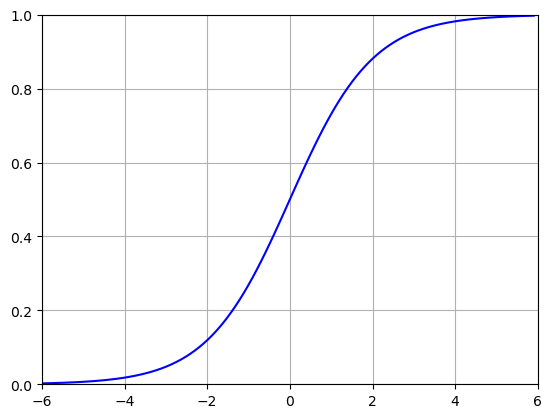

In [2]:
# Check the sigmoid function
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure()
plt.axis([-6,6,0,1])
plt.grid(True)
X = np.arange(-6, 6, 0.1)

# sigmoid function
y = 1/(1+np.e**(-X))

plt.plot(X, y, 'b-')

In [3]:
test = %run 03准备一个更好的训练集.ipynb

train accuracy: 0.834671
test accuracy: 0.820896


In [4]:
train_X.head()
train_y.head()

,SibSp,Parch,Fare,family_size,is_mother,onehot_male,onehot_female,onehot_Age_0_16,onehot_Age_16_32,onehot_Age_32_48,onehot_Age_48_64,onehot_Age_64_,onehot_Master,onehot_Miss,onehot_Mr,onehot_Mrs,onehot_Rare,onehot_pclass_1,onehot_pclass_2,onehot_pclass_3
0,1,0,7.2500,2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,0,71.2833,2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0,0,7.9250,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,0,53.1000,2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,8.0500,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_X, train_y, test_size = 0.3, random_state = 42)

In [6]:
X_train.head()
X_test.head()

,SibSp,Parch,Fare,family_size,is_mother,onehot_male,onehot_female,onehot_Age_0_16,onehot_Age_16_32,onehot_Age_32_48,onehot_Age_48_64,onehot_Age_64_,onehot_Master,onehot_Miss,onehot_Mr,onehot_Mrs,onehot_Rare,onehot_pclass_1,onehot_pclass_2,onehot_pclass_3
445,0,2,81.8583,3,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
650,0,0,7.8958,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
172,1,1,11.1333,3,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
450,1,2,27.7500,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
314,1,1,26.2500,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


,SibSp,Parch,Fare,family_size,is_mother,onehot_male,onehot_female,onehot_Age_0_16,onehot_Age_16_32,onehot_Age_32_48,onehot_Age_48_64,onehot_Age_64_,onehot_Master,onehot_Miss,onehot_Mr,onehot_Mrs,onehot_Rare,onehot_pclass_1,onehot_pclass_2,onehot_pclass_3
709,1,1,15.2458,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
439,0,0,10.5000,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
840,0,0,7.9250,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
720,0,1,33.0000,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
39,1,0,11.2417,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1


In [7]:
# Train and validate the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
y_train_pred = lr.predict(X_train) # Predict on the training set and output the labels
print("training set: ")
print(classification_report(y_train, y_train_pred))

y_test_pred = lr.predict(X_test) # Make predictions on the test set
print("test set: ")
print(classification_report(y_test, y_test_pred))

training set: 
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       392
         1.0       0.81      0.73      0.77       231

    accuracy                           0.83       623
   macro avg       0.83      0.81      0.82       623
weighted avg       0.83      0.83      0.83       623

test set: 
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       157
         1.0       0.82      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [9]:
# result
lr.intercept_
lr.coef_
pd.DataFrame(list(zip(np.transpose(lr.coef_), train_X.columns)), columns = ['coef', 'columns'])

array([0.45251057])

array([[-0.2834563 , -0.2167293 ,  0.00724549, -0.20688492,  0.17705834,
        -0.64801363,  0.94131431,  0.84851945,  0.04253886, -0.13996234,
        -0.40584622, -0.05194907,  1.53968203, -0.02797035, -1.18491953,
         0.79386937, -0.87308611,  0.71716205,  0.31477723, -0.73863861]])

,coef,columns
0,[-0.28345630129197547],SibSp
1,[-0.21672929733538743],Parch
2,[0.0072454932826704985],Fare
3,[-0.20688492279829426],family_size
4,[0.1770583402043277],is_mother
5,[-0.6480136337662938],onehot_male
6,[0.9413143095954052],onehot_female
7,[0.8485194475716158],onehot_Age_0_16
8,[0.04253885537747692],onehot_Age_16_32
9,[-0.13996233891593932],onehot_Age_32_48


# Manually tuning parameters to train the model

In [12]:
lr = LogisticRegression(C = 1, penalty = 'l2')
lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
print("Test set: ")
print(classification_report(y_test, y_test_pred))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Test set: 
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       157
         1.0       0.82      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



# Automated parameter tuning--gird search

In [13]:
#from sklearn.grid_search import GridSearchCV # outdated
from sklearn.model_selection import GridSearchCV

In [14]:
parameters = {
    'penalty' : ('l1', 'l2'),
    'C' : (0.01, 0.1, 1, 10)
}

lr = LogisticRegression()
grid_search = GridSearchCV(lr, parameters, scoring = 'accuracy', cv = 5)
grid_search.fit(train_X, train_y)

,estimator,LogisticRegression()
,param_grid,"{'C': (0.01, ...), 'penalty': ('l1', ...)}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [15]:
# results
grid_search.best_estimator_
grid_search.best_score_
grid_search.best_params_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


np.float64(0.8170422446801833)

{'C': 1, 'penalty': 'l2'}

In [16]:
# Predict on the test set using the optimal parameters
predictions = grid_search.predict(X_test)
print("accuracy: ", accuracy_score(y_test, predictions))
print("precision: ", precision_score(y_test, predictions))
print("recall: ", recall_score(y_test, predictions))

accuracy:  0.8208955223880597
precision:  0.8181818181818182
recall:  0.7297297297297297


In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       157
         1.0       0.82      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

